# Section 4 - Simple Linear Regression

In [1]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats

# Teste de Premissas

In [ ]:
# Normalidade

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
plt.show()
stats.probplot(measurements, dist="uniform", plot=pylab)
plt.show()


In [ ]:
# import numpy as np
# import scipy.stats as stats

# #generate random aray
# arr_1 = np.random.normal(0, 1.0, size=100)

# #edf
# arr_1_edf = np.arange(1/len(arr_1), 1+1/len(arr_1), 1/len(arr_1))

# #sort generated array
# arr_1_sorted = np.sort(arr_1)

# #get cdf based on norm distribution
# cdf_null_hyp = [stats.norm.cdf(x) for x in arr_1_sorted]

# #calculate absolute difference
# arr_dif_abs = np.abs(cdf_null_hyp-arr_1_edf)

# #get max difference
# dn_ks = max(arr_dif_abs)

# plt.plot(cdf_null_hyp, c='b', label = 'null hypothesis distribution');
# plt.plot(arr_1_edf, c='g', label = 'data distribution');
# plt.legend(loc='best');

In [ ]:
stats.kstest(np.random.normal(0,1,10000),'norm')

In [ ]:
stats.kstest(np.random.uniform(0,1,10000),'norm')

In [ ]:
stats.kstest(np.random.random(10000),'norm')

In [ ]:
import numpy as np
import scipy.stats as stats

mu = 0.3
sigma = 5

num_tests = 10**3
num_rejects = 0
alpha = 0.05
for i in range(num_tests):
    data = np.random.normal(mu, sigma, 10000)
    # normed_data = (data - mu) / sigma    # this is okay
    # 4915/100000 = 0.05 rejects at rejection level 0.05 (as expected)
    normed_data = (data - data.mean()) / data.std()    # this is NOT okay
    # 20/100000 = 0.00 rejects at rejection level 0.05 (not expected)
    D, pval = stats.kstest(normed_data, 'norm')
    if pval < alpha:
        num_rejects += 1
ratio = float(num_rejects) / num_tests

print('{}/{} = {:.2f} rejects at rejection level {}'.format(
    num_rejects, num_tests, ratio, alpha))     

# Case 0 - Salary Prediction

In [ ]:
#Import data
dataset=pd.read_csv(r'../Data/Salary_Data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin=LinearRegression()
y_pred= lin.fit(X_train, y_train).predict(X_test)

In [ ]:
y_val= X*lin.coef_[0]+lin.intercept_

y_val=y_val.reshape(1,-1)[0]

cost=np.sum((y-y_val)**2)/len(y_val)
cost

In [ ]:
#SCORE: Return the coefficient of determination R^2 of the prediction.

print('test_score:',lin.score(X_test,y_test))
print('train_score:',lin.score(X_train, y_train))
print('dataset_score:',lin.score(X, y))

In [ ]:
lin.__dict__

In [ ]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lin.predict(X_train), marker='^', alpha=0.2, color='blue')
plt.title('Salary vs Experience (Train)')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (dollars)')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin.predict(X_test), marker='^', alpha=0.2, color='blue')
plt.title('Salary vs Experience (Test)')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (dollars)')
plt.show()

In [ ]:
# line=np.arange(0,12,0.1)
# y_val= line*lin.coef_[0]+lin.intercept_

# plt.plot(X,y,'o')
# plt.plot(line, y_val)
# plt.plot(X_test, y_test, 'v')
# plt.xlabel('ID person')
# plt.ylabel('Salary')

In [ ]:
print(lin.score(X_test, y_test))
SSres=np.sum((y_test-lin.predict(X_test))**2)
SStot=np.sum((y_test-np.mean(y_test)*np.ones(len(y_test)))**2)

R=np.sqrt(1-SSres/SStot)
R

# Case 2 - Multiple Linear Regression

5 methods of building models:
    
 - All-in 
 - Backward Elimination 
 - Forward Selection
 - Bidirectional Elimination
 - Score Comparison

In [5]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Import data
dataset=pd.read_csv(r'../Data/50_Startups.csv')
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [8]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
for column in categorical_cols:
    print('Enconding:',column)
    ohe = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown='ignore') 
    ohe.fit(dataset[[column]])
    aux = pd.DataFrame(ohe.fit_transform(dataset[[column]]),
                       columns=list(np.array(ohe.categories_)[0])).add_prefix(column + '_')
    dataset.drop(columns=column,inplace=True)
    dataset = pd.concat([dataset, aux], axis=1)


Enconding: State


In [10]:
target = 'Profit'
X=dataset.drop(columns=target)
y=dataset[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred=lin.predict(X_test)

print('test_score:',lin.score(X_train, y_train))
print('train_score:',lin.score(X_test, y_test))
print('data_score:',lin.score(X, y))

test_score: 0.9576035764205424
train_score: 0.8752655285748309
data_score: 0.9416843347867826


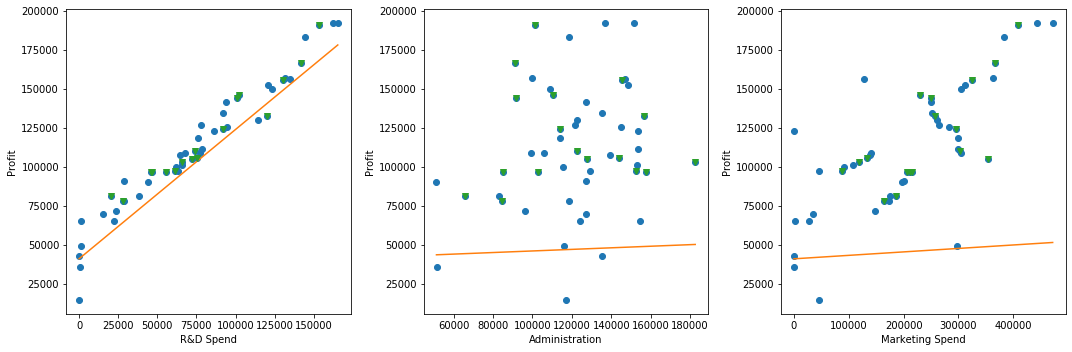

In [11]:
fig, axes= plt.subplots(1,3,figsize=(15,5))

for i,ax in zip(range(0,3),axes):
    line=np.arange(min(X.iloc[:,i]),max(X.iloc[:,i]),0.1)
    y_val= line*lin.coef_[i]+lin.intercept_
    ax.plot(X.iloc[:,i],y.values,'o')
    ax.plot(line, y_val)
    ax.plot(X_test.iloc[:,i], y_test, 'v')
    ax.set_xlabel(dataset.columns[i])
    ax.set_ylabel(target)
    
plt.tight_layout()

In [12]:
print(lin.coef_,lin.intercept_)

[ 8.28371991e-01  5.03972419e-02  2.21861926e-02 -1.86280085e+03
  4.06383296e+03 -2.20103211e+03] 41011.48935223663



# Using Backward Elimination on Regression

    -Select a significance level, say 5% (0.05)
    -Fit a model with all features (variables)
    -Consider the feature with the highest P-Value. If its P-value is greater than significance level (P > SL), go to step 4. Else, your model is ready.
    -Eliminate this feature (variable).
    -Fit a model with the new set of features, and go to step 3.

P value is a statistical measure that helps scientists determine whether or not their hypotheses are correct. P values are used to determine whether the results of their experiment are within the normal range of values for the events being observed. Usually, if the P value of a data set is below a certain pre-determined amount (like, for instance, 0.05), scientists will reject the "null hypothesis" of their experiment - in other words, they'll rule out the hypothesis that the variables of their experiment had no meaningful effect on the results.

The purpose of finding a p-value is basically to determine whether the observed results differ from the expected results to such a degree that the "null hypothesis" - the hypothesis that there is no relationship between the experimental variable(s) and the observed results - is unlikely enough to reject

In [18]:
conda upgrade --all

^C

Note: you may need to restart the kernel to use updated packages.


In [13]:
import statsmodels.regression.linear_model as sm

In [15]:
reg_OLS=sm.OLS(endog=np.array(y_train), exog=np.array(X_train)).fit()

In [17]:
# Meus resíduos são normais?

reg_OLS.predict(np.array(X_train))

AttributeError: module 'pandas' has no attribute 'Panel'

In [16]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           1.18e-17
Time:                        23:12:59   Log-Likelihood:                -347.02
No. Observations:                  33   AIC:                             706.0
Df Residuals:                      27   BIC:                             715.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8284      0.061     13.580      0.000       0.703       0.954
x2             0.0504      0.073      0.687      0.498      -0.100       0.201
x3             0.0222      0.021      1.063      0.297      -0.021       0.065
x4          3.915e+04   9007.467      4.346      0.000    2.07e+04    5.76e+04
x5          4.508e+04   1.02e+04      4.401      0.000    2.41e+04    6.61e+04
x6          3.881e+04   9328.986      4.160      0.000    1.97e+04     5.8e+04
==============================================================================
Omnibus:                       13.089   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.973
Skew:                          -0.992   Prob(JB):                     0.000206
Kurtosis:                       5.899   Cond. No.                     2.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
predict(params[, exog])

SyntaxError: invalid syntax (<ipython-input-220-25794be3e033>, line 1)

In [ ]:
# the index 2 has the biggest p-value
X_opt= X[:,[0,1,3,4,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

In [ ]:
# the index 1 has the biggest p-value
X_opt= X[:,[0,3,4,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

In [ ]:
# the index 1 has the biggest p-value
X_opt= X[:,[0,3,5]]
reg_OLS=sm.OLS(endog=y, exog=X_opt).fit()
reg_OLS.summary()

In [ ]:
from sklearn.linear_model import LinearRegression

dataset=pd.read_csv(r'../../Datasets/Machine_Learning_A_Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv')

X=X_opt

y=dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred= lin.predict(X_test)

print('test_score:',lin.score(X_test,y_test))
print('train_score:',lin.score(X_train, y_train))
print('dataset_score:',lin.score(X, y))

In [ ]:
test_score: 0.9576035764205424
train_score: 0.8752655285748183
data_score: 0.9416843347867802

In [ ]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print("the variable {} has SL value of {} which is bigger than 0.05\n".format(j,maxVar))
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)